HSV to RGB


Text(0.5, 1.0, 'Canal Value')

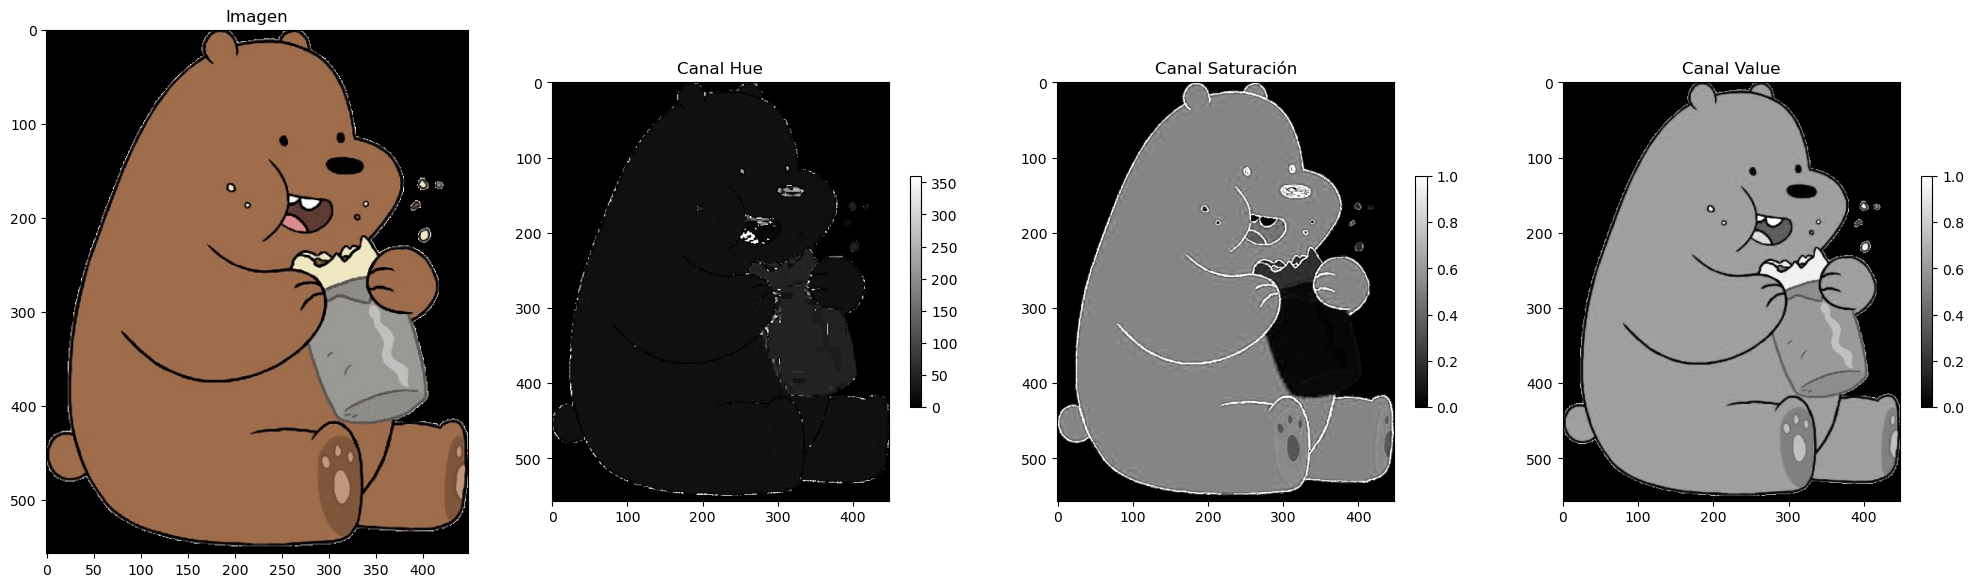

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

path="../imagenes/pardoOriginal.png"
Imagen = cv2.imread(path)
img= cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
def RGB2HSV(img):
    img = img.astype(np.float32)
    img = img/255.
    new_img = np.zeros_like(img)

    maxChannel = np.argmax(img,axis=2)
    maxValue = np.amax(img,axis=2)
    minChannel = np.argmin(img,axis=2)
    minValue = np.amin(img,axis=2)
    #value 
    new_img[...,2] = maxValue

    #saturation
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if maxValue[i,j]==0:
                new_img[i,j,1] = 0
            elif maxValue[i,j] != 0:
                new_img[i,j,1] = (new_img[i,j,2]-minValue[i,j])/new_img[i,j,2]

    #hue 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if sum(img[i,j,...])/3 == img[i,j,0]:
                new_img[i,j,0] = 0
            elif maxChannel[i,j] == 0: #R 
                new_img[i,j,0] = 60 * ((img[i,j,1]-img[i,j,2])/(new_img[i,j,2]-minValue[i,j]))
            elif maxChannel[i,j] == 1: #G
                new_img[i,j,0] = 120 + 60 * (img[i,j,2]-img[i,j,0])/(new_img[i,j,2]-minValue[i,j])
            elif maxChannel[i,j] == 2: #B
                new_img[i,j,0] = 240 + 60 * (img[i,j,0]-img[i,j,1])/(new_img[i,j,2]-minValue[i,j])

        bol_ind = new_img[...,0] < 0
        new_img[bol_ind,0]   =  new_img[bol_ind,0] + 360
    return new_img 

hsv_img =  RGB2HSV(img) 
fig, axs = plt.subplots(1,4,figsize=(25,10))
axs[0].imshow(img)
axs[0].set_title('Imagen')
fig_img = axs[1].imshow(hsv_img[...,0],cmap='gray',vmin=0,vmax=360)
fig.colorbar(fig_img, ax=axs[1],shrink=0.3)
axs[1].set_title('Canal Hue')
fig_img = axs[2].imshow(hsv_img[...,1],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Saturación')
fig_img = axs[3].imshow(hsv_img[...,2],cmap='gray',vmin=0,vmax=1)
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Value')


HSV to RGB

Text(0.5, 1.0, 'Canal Azul')

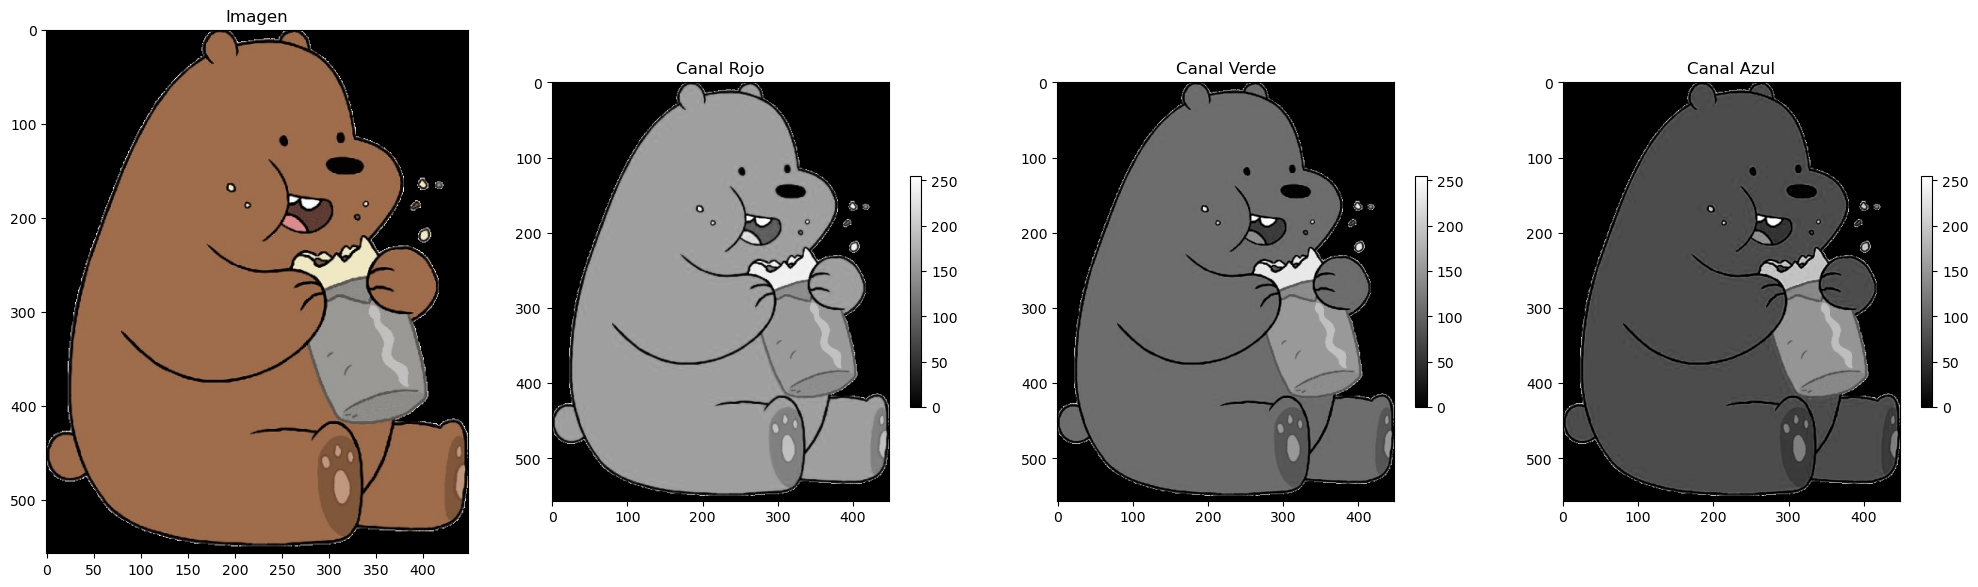

In [5]:
def HSV2RGB(img):
    new_img = np.zeros_like(img)
    
    C = img[...,2]*img[...,1]
    X = C*(1-abs((img[...,0]/60)%2-1))
    m = img[...,2]-C

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h = img[i,j,0]
            if 0 <= h and h < 60:
                new_img[i,j] = C[i,j],X[i,j],0
            elif 60 <= h and h < 120:
                new_img[i,j] = X[i,j],C[i,j],0
            elif 120 <= h and h < 180:
                new_img[i,j] = 0,C[i,j],X[i,j]
            elif 180 <= h and h < 240:
                new_img[i,j] = 0,X[i,j],C[i,j]
            elif 240 <= h and h < 300:
                new_img[i,j] = X[i,j],0,C[i,j]
            elif 300 <= h and h < 360:
                new_img[i,j] = C[i,j],0,X[i,j]
    new_img[...,0] = (new_img[...,0]+m)*255
    new_img[...,1] = (new_img[...,1]+m)*255
    new_img[...,2] = (new_img[...,2]+m)*255
    new_img = new_img.astype(int)
    return new_img 
rgb_img =   HSV2RGB(hsv_img) 
fig, axs = plt.subplots(1,4,figsize=(25,10))

axs[0].imshow(img)
axs[0].set_title('Imagen')


fig_img = axs[1].imshow(rgb_img[...,0],cmap='gray',vmin=0,vmax=255)
fig.colorbar(fig_img, ax=axs[1],shrink=0.3)
axs[1].set_title('Canal Rojo')


fig_img = axs[2].imshow(rgb_img[...,1],cmap='gray',vmin=0,vmax=255)
fig.colorbar(fig_img, ax=axs[2],shrink=0.3)
axs[2].set_title('Canal Verde')


fig_img = axs[3].imshow(rgb_img[...,2],cmap='gray',vmin=0,vmax=255)
fig.colorbar(fig_img, ax=axs[3],shrink=0.3)
axs[3].set_title('Canal Azul')

Text(0.5, 1.0, 'imagen rgb2')

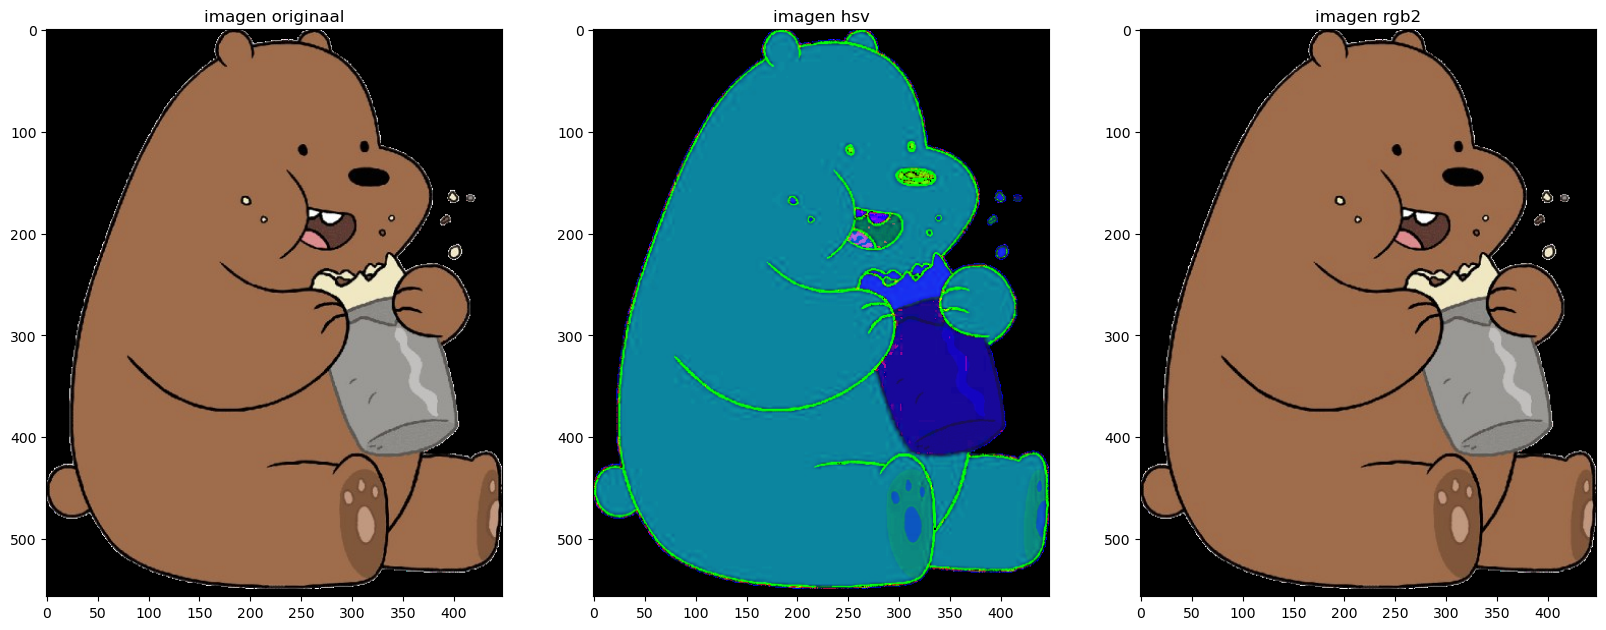

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

path="../imagenes/pardoOriginal.png"
img_rgb= cv2.cvtColor(cv2.imread(path,cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
img_hsv=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)

img_rgb2=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)

fig,axs=plt.subplots(1,3,figsize=(20,10))

axs[0].imshow(img_rgb)
axs[0].set_title('imagen originaal')

axs[1].imshow(img_hsv)
axs[1].set_title('imagen hsv')

axs[2].imshow(img_rgb2)
axs[2].set_title('imagen rgb2')


Text(0.5, 1.0, 'Imagen binaria inversa')

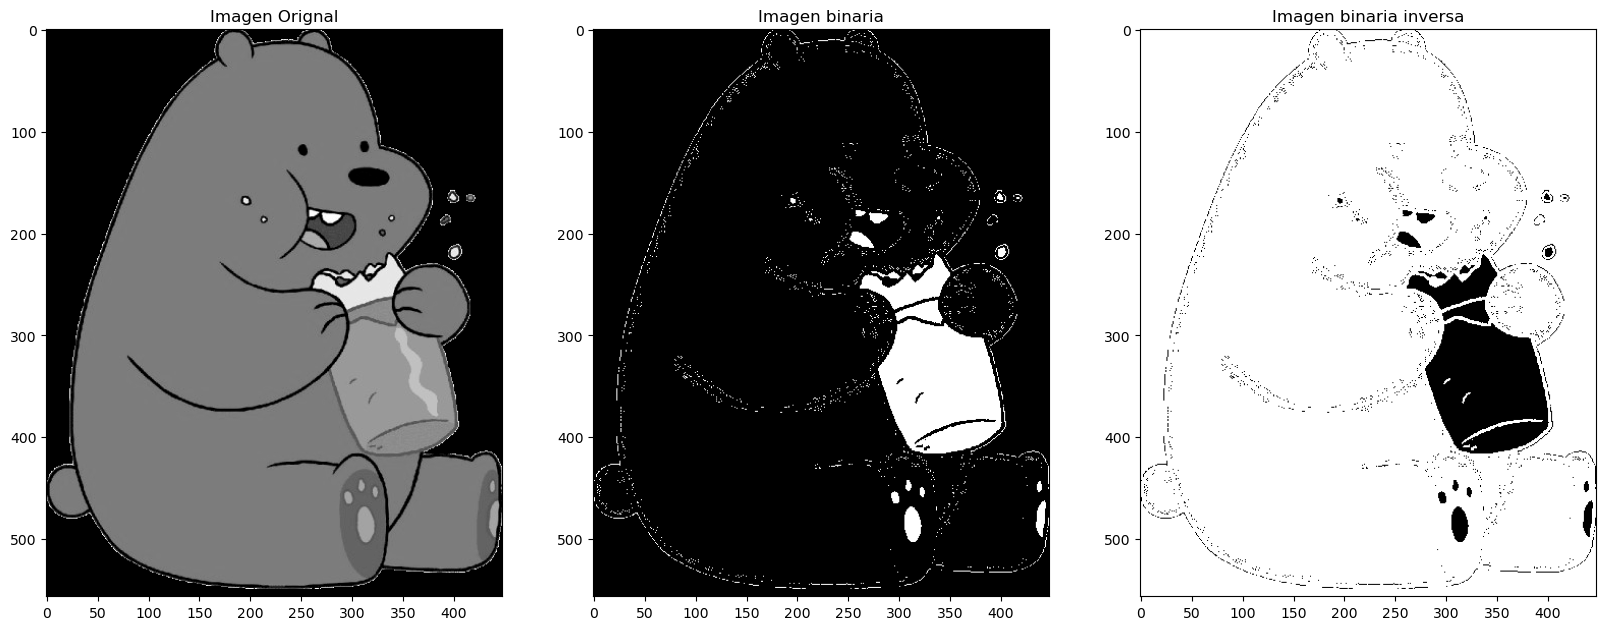

In [ ]:
import cv2 
import matplotlib.pyplot as plt
path="../imagenes/pardoOriginal.png"

imagen =cv2.imread(path,0)

_,umbrealBinario=cv2.threshold(imagen,127,255,cv2.THRESH_BINARY)


_,umbrealInverso=cv2.threshold(imagen,127,255,cv2.THRESH_BINARY_INV)


fig,axs=plt.subplots(1,3,figsize=(20,10))

axs[0].imshow(imagen,cmap='gray')
axs[0].set_title("Imagen Orignal")



axs[1].imshow(umbrealBinario,cmap='gray')
axs[1].set_title("Imagen binaria")

axs[2].imshow(umbrealInverso,cmap='gray')
axs[2].set_title("Imagen binaria inversa")